محمد پیام تائبی    400104867

## **1)**

# firt i implement lagrange_interpolation and newton_interpolation

In [1]:
def lagrange_interpolation(x_values, y_values, x):
    """
    Lagrange interpolation for a set of data points.

    Parameters:
    - x_values: List of x-coordinates of data points.
    - y_values: List of y-coordinates of data points.
    - x: The point for which to find the interpolated value.

    Returns:
    - Interpolated value at point x.
    """

    n = len(x_values)
    result = 0.0

    for i in range(n):
        term = y_values[i]
        for j in range(n):
            if j != i:
                term *= (x - x_values[j]) / (x_values[i] - x_values[j])
        result += term

    return result




In [2]:
def divided_difference_table(x_values, y_values):
    """
    Create the divided difference table.

    Parameters:
    - x_values: List of x-coordinates of data points.
    - y_values: List of y-coordinates of data points.

    Returns:
    - Divided difference table as a list of lists.
    """

    n = len(x_values)
    table = [[0] * n for _ in range(n)]

    # Fill in the first column with y values
    for i in range(n):
        table[i][0] = y_values[i]

    # Compute the divided differences
    for j in range(1, n):
        for i in range(n - j):
            table[i][j] = (table[i + 1][j - 1] - table[i][j - 1]) / (x_values[i + j] - x_values[i])

    return table

def newton_interpolation(x_values, y_values, x):
    """
    Newton's divided difference interpolation.

    Parameters:
    - x_values: List of x-coordinates of data points.
    - y_values: List of y-coordinates of data points.
    - x: The point for which to find the interpolated value.

    Returns:
    - Interpolated value at point x.
    """

    n = len(x_values)
    result = 0.0
    table = divided_difference_table(x_values, y_values)

    for i in range(n):
        term = table[0][i]
        for j in range(i):
            term *= (x - x_values[j])
        result += term

    return result


now you can use it in every n points you want

first calculate corresponding points

In [3]:
import math

# Define the function F(x)
def F(x):
    return math.sin(x) + math.sqrt(1 + x)

def G(x):
    return 1/(1-x)

# Given x values
f_x_values = [2, 3, 5, 8, 10]

# Calculate corresponding y values
f_y_values = [F(x) for x in f_x_values]

g_x_values = [5, 7, 9, 11]

g_y_values = [G(x) for x in g_x_values]


now use interpolation

## for F

In [4]:
print("f(6.5) using newton : ",newton_interpolation(f_x_values,f_y_values,6.5))
print("f(6.5) using lagrange : ",lagrange_interpolation(f_x_values,f_y_values,6.5))

f(6.5) using newton :  2.448243198195968
f(6.5) using lagrange :  2.448243198195968


# for G

In [5]:
print("g(8) using newton : ",newton_interpolation(g_x_values,g_y_values,8))
print("g(8) using lagrange : ",lagrange_interpolation(g_x_values,g_y_values,8))

g(8) using newton :  -0.1421875
g(8) using lagrange :  -0.1421875


## **2)**

first i implement least square error and minimize it and return Coefficients

In [6]:
import numpy as np

def least_squares_polynomial_fit(x_values, y_values, degree=5):
    """
    Fit a polynomial of given degree to the given data points using the least squares method.

    Parameters:
    - x_values: List of x-coordinates of data points.
    - y_values: List of y-coordinates of data points.
    - degree: Degree of the polynomial.

    Returns:
    - Coefficients of the polynomial (a_0, a_1, ..., a_degree).
    a_i is about x^i
    """

    # Ensure the lengths of x_values and y_values match
    if len(x_values) != len(y_values):
        raise ValueError("Number of x and y values must be the same.")

    # Create the matrix X
    X = np.vander(x_values, degree + 1, increasing=True)

    # Create the column vector Y
    Y = np.array(y_values).reshape(-1, 1)

    # Compute the coefficients using the least squares formula
    coefficients = np.linalg.inv(X.T @ X) @ X.T @ Y

    return coefficients.flatten()


now write func which sample n point from function F

In [7]:
import numpy as np

def generate_samples(func, n, x_range):
    """
    Generate n samples from the given function within the specified x range.

    Parameters:
    - func: The function to sample (e.g., F(x)).
    - n: The number of samples to generate.
    - x_range: A tuple (min_x, max_x) specifying the range of x values.

    Returns:
    - x_values: List of n x-coordinates.
    - y_values: List of corresponding y-coordinates.
    """

    min_x, max_x = x_range
    x_values = np.linspace(min_x, max_x, n)
    y_values = [func(x) for x in x_values]

    return x_values, y_values

now using horner's algorithm to compute P(x)

In [8]:
def evaluate_polynomial(coefficients, x):
    """
    Evaluate a polynomial with given coefficients at a specified point using Horner's method.

    Parameters:
    - coefficients: List of coefficients [a_0, a_1, ..., a_m].
    - x: The point at which to evaluate the polynomial.

    Returns:
    - The value of the polynomial at the specified point.
    """

    result = 0
    for coefficient in reversed(coefficients):
        result = result * x + coefficient

    return result


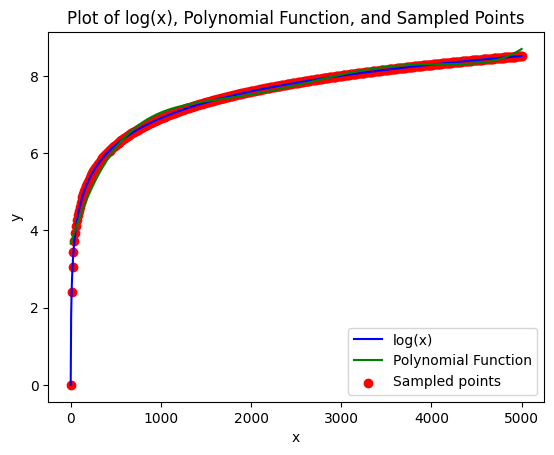

In [9]:
import matplotlib.pyplot as plt

def log_function(x):
    return np.log(x)

n= 500
m = 5
minV = 1
maxV = 5000

# Generate sampled points
x_values, y_values = generate_samples(log_function, n, (minV, maxV))

# Fit a polynomial to the sampled points
cof = least_squares_polynomial_fit(x_values, y_values, degree=m)


# Generate x values for plotting
x_values_plot = np.linspace(minV, maxV, 1000)  # Adjust the range and resolution as needed

# Calculate y values for the log(x) function
y_values_log = log_function(x_values_plot)

# Calculate y values for the polynomial function
y_values_polynomial = np.polyval(np.flip(cof), x_values_plot)


# Plot the log(x) function
plt.plot(x_values_plot, y_values_log, label='log(x)', color='blue')

# Plot the polynomial function
plt.plot(x_values_plot, y_values_polynomial, label='Polynomial Function', color='green')

# Plot the sampled points
plt.scatter(x_values, y_values, label='Sampled points', color='red')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of log(x), Polynomial Function, and Sampled Points')

# Add a legend
plt.legend()

# Show the plot
plt.show()

so its looks great !

now calculate error for random points

In [10]:
def calculate_error(coefficients, x_values, target_function):
    # Evaluate the polynomial function
    y_values_polynomial = evaluate_polynomial(coefficients, x_values)

    # Evaluate the target function (e.g., log function)
    y_values_target = target_function(x_values)

    # Calculate the absolute error between the polynomial and target function
    error = np.abs(y_values_polynomial - y_values_target)

    # Sum up the errors
    total_error = np.sum(error)

    return total_error / len(x_values)

total_error = calculate_error(cof, x_values, log_function)

print(f'Total error per each point: {total_error}')

Total error per each point: 0.09241142999310603


## 3)

first function

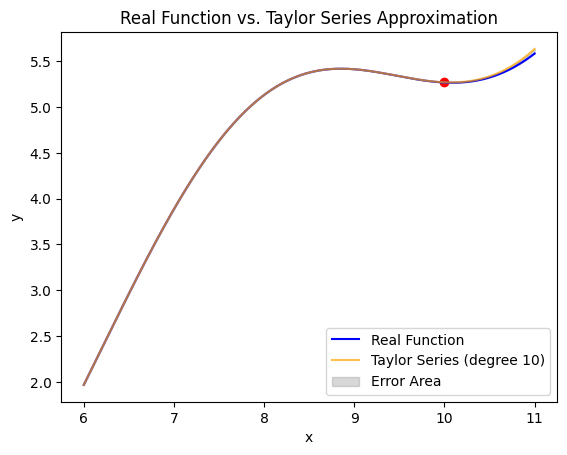

Taylor series up to degree 10:
       10 ⎛   sin(7)      12155⋅√7   ⎞   ⎛   3575⋅√7      cos(7)⎞        9   ⎛
(x - 7)  ⋅⎜- ─────── - ──────────────⎟ + ⎜───────────── + ──────⎟⋅(x - 7)  + ⎜
          ⎝  3628800   74049191673856⎠   ⎝2644613988352   362880⎠            ⎝

    2145⋅√7      sin(7)⎞        8          7 ⎛  cos(7)     165⋅√7  ⎞          
- ──────────── + ──────⎟⋅(x - 7)  + (x - 7) ⋅⎜- ────── + ──────────⎟ + (x - 7)
  188900999168   40320 ⎠                     ⎝   5040    1686616064⎠          

6 ⎛  sin(7)    15⋅√7  ⎞   ⎛ 5⋅√7    cos(7)⎞        5   ⎛  25⋅√7    sin(7)⎞    
 ⋅⎜- ────── - ────────⎟ + ⎜────── + ──────⎟⋅(x - 7)  + ⎜- ────── + ──────⎟⋅(x 
  ⎝   720     17210368⎠   ⎝614656    120  ⎠            ⎝  307328     24  ⎠    

    4          3 ⎛  cos(7)   5⋅√7⎞          2 ⎛  sin(7)   5⋅√7⎞           ⎛   
- 7)  + (x - 7) ⋅⎜- ────── + ────⎟ + (x - 7) ⋅⎜- ────── - ────⎟ + (x - 7)⋅⎜cos
                 ⎝    6      5488⎠            ⎝    2      392 ⎠           ⎝   

      5⋅√7⎞      

In [11]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Define the variable and function
x = sp.symbols('x')
F = sp.sin(x) + 5 * sp.sqrt(x) - 10

# Specify the center of the expansion
a = 7

# Specify the desired error threshold
desired_error = 0.01

# Initialize variables
n = 1
current_error = sp.Abs(F - sum([F.diff(x, i).subs(x, a) / sp.factorial(i) * (x - a)**i for i in range(n + 1)])).subs(x, 10)

# Increase the degree of the Taylor series until the error is less than the desired threshold
while current_error > desired_error:
    n += 1
    current_error = sp.Abs(F - sum([F.diff(x, i).subs(x, a) / sp.factorial(i) * (x - a)**i for i in range(n + 1)])).subs(x, 10)

# Calculate the Taylor series expression up to degree n
taylor_series_expr = sum([F.diff(x, i).subs(x, a) / sp.factorial(i) * (x - a)**i for i in range(n + 1)])

# Create a lambda function for numerical evaluation
taylor_series_numeric = sp.lambdify(x, taylor_series_expr, 'numpy')
F_numeric = sp.lambdify(x, F, 'numpy')

# Calculate the Taylor series value at x = 10
taylor_value_at_10 = sum([F.diff(x, i).subs(x, a) / sp.factorial(i) * (10 - a)**i for i in range(n + 1)])

# Calculate the actual function value at x = 10
actual_value_at_10 = F.subs(x, 10)

# Calculate the error
error = sp.Abs(actual_value_at_10 - taylor_value_at_10)

# Plot the real function and the Taylor series approximation with transparency and shadow
x_vals = np.linspace(6, 11, 400)
plt.plot(x_vals, F_numeric(x_vals), label='Real Function', color='blue')
plt.plot(x_vals, taylor_series_numeric(x_vals), label=f'Taylor Series (degree {n})', color='orange', alpha=0.7)
plt.scatter([10], [actual_value_at_10.evalf()], color='red')  # Mark the point x=10 on the real function
plt.fill_between(x_vals, F_numeric(x_vals), taylor_series_numeric(x_vals), color='gray', alpha=0.3, label='Error Area')
plt.title('Real Function vs. Taylor Series Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Print the Taylor series and the degree of the polynomial used
print(f'Taylor series up to degree {n}:\n{sp.pretty(taylor_series_expr)}')

# Print the calculated values and error
print(f'\nActual value at x = 10: {actual_value_at_10.evalf()}')
print(f'Taylor series value at x = 10: {taylor_value_at_10.evalf()}')
print(f'Error: {error.evalf()}')


second function

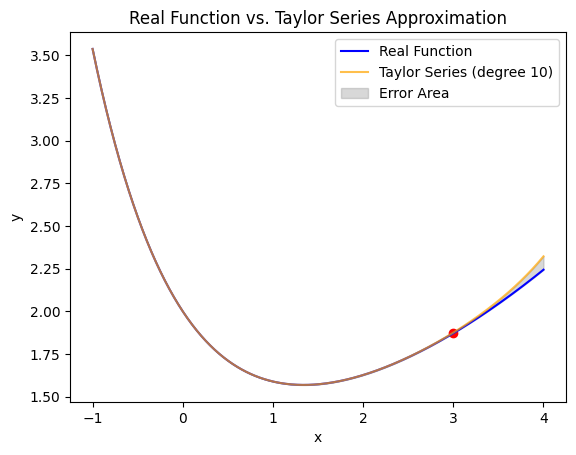

Taylor series up to degree 10:
          10              9             8           7         6        5      
 4882813⋅x        488281⋅x      195313⋅x     19531⋅x    7813⋅x    781⋅x    313
────────────── - ──────────── + ────────── - ──────── + ─────── - ────── + ───
17718750000000   177187500000   7875000000   98437500   5625000   93750     75

  4       3       2          
⋅x    62⋅x    13⋅x    4⋅x    
─── - ───── + ───── - ─── + 2
00     375      25     5     

Actual value at x = 3: 1.87190586875837
Taylor series value at x = 3: 1.87544469315200
Error: 0.00353882439362708


In [12]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Define the variable and function
x = sp.symbols('x')
F = sp.exp(x/5) + sp.exp(-x)

# Specify the center of the expansion
a = 0

# Specify the desired error threshold
desired_error = 0.01

# Initialize variables
n = 1
current_error = sp.Abs(F - sum([F.diff(x, i).subs(x, a) / sp.factorial(i) * (x - a)**i for i in range(n+1)])).subs(x, 3)

# Increase the degree of the Taylor series until the error is less than the desired threshold
while current_error > desired_error:
    n += 1
    current_error = sp.Abs(F - sum([F.diff(x, i).subs(x, a) / sp.factorial(i) * (x - a)**i for i in range(n+1)])).subs(x, 3)

# Calculate the Taylor series expression up to degree n
taylor_series_expr = sum([F.diff(x, i).subs(x, a) / sp.factorial(i) * (x - a)**i for i in range(n+1)])

# Create a lambda function for numerical evaluation
taylor_series_numeric = sp.lambdify(x, taylor_series_expr, 'numpy')
F_numeric = sp.lambdify(x, F, 'numpy')

# Plot the real function and the Taylor series approximation with transparency and shadow
x_vals = np.linspace(-1, 4, 400)
plt.plot(x_vals, F_numeric(x_vals), label='Real Function', color='blue')
plt.plot(x_vals, taylor_series_numeric(x_vals), label=f'Taylor Series (degree {n})', color='orange', alpha=0.7)
plt.scatter([3], [F.subs(x, 3).evalf()], color='red')  # Mark the point x=3 on the real function
plt.fill_between(x_vals, F_numeric(x_vals), taylor_series_numeric(x_vals), color='gray', alpha=0.3, label='Error Area')
plt.title('Real Function vs. Taylor Series Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Calculate the Taylor series value at x = 3
taylor_value_at_3 = sum([F.diff(x, i).subs(x, a) / sp.factorial(i) * (3 - a)**i for i in range(n+1)])

# Calculate the actual function value at x = 3
actual_value_at_3 = F.subs(x, 3)

# Calculate the error
error = sp.Abs(actual_value_at_3 - taylor_value_at_3)

# Print the Taylor series and the degree of the polynomial used
print(f'Taylor series up to degree {n}:\n{sp.pretty(taylor_series_expr, use_unicode=True)}')

# Print the calculated values and error
print(f'\nActual value at x = 3: {actual_value_at_3.evalf()}')
print(f'Taylor series value at x = 3: {taylor_value_at_3.evalf()}')
print(f'Error: {error.evalf()}')


# 4)

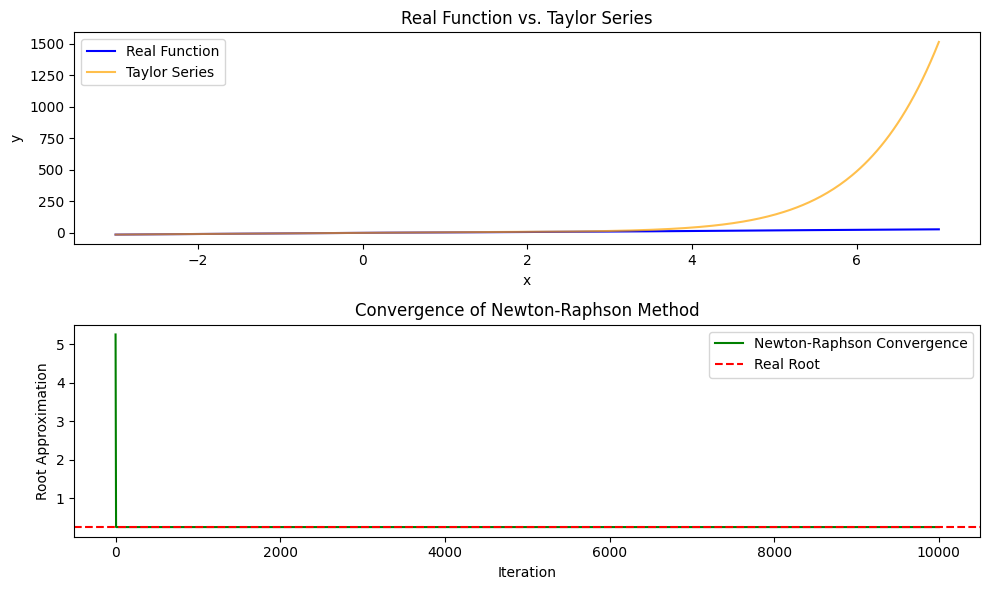

Taylor series expansion of 4*x + cos(x) - 2 around a = -3 up to degree 10:
         10                 9                 8                 7             
  (x + 3)  ⋅cos(3)   (x + 3) ⋅sin(3)   (x + 3) ⋅cos(3)   (x + 3) ⋅sin(3)   (x 
- ──────────────── + ─────────────── + ─────────────── - ─────────────── - ───
      3628800             362880            40320              5040           

    6                 5                 4                 3                 2 
+ 3) ⋅cos(3)   (x + 3) ⋅sin(3)   (x + 3) ⋅cos(3)   (x + 3) ⋅sin(3)   (x + 3) ⋅
──────────── + ─────────────── + ─────────────── - ─────────────── - ─────────
   720               120                24                6                 2 

                                           
cos(3)                                     
────── + (x + 3)⋅(sin(3) + 4) - 14 + cos(3)
                                           
Final Root Approximation using Newton-Raphson: 0.25716369090929325
Real Root of 4*x + cos(x) - 2: 0.258293158505120

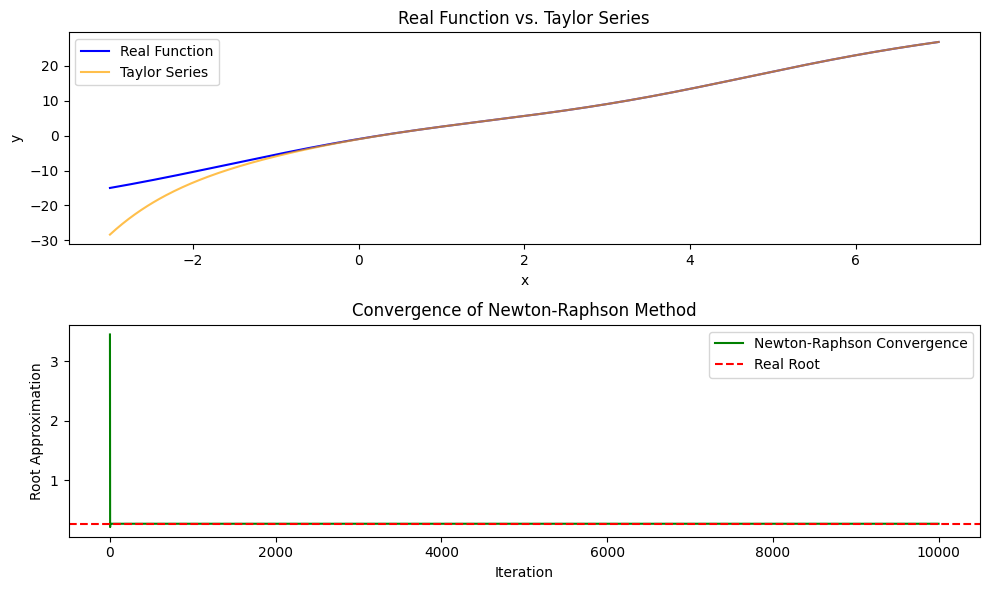

Taylor series expansion of 4*x + cos(x) - 2 around a = 4 up to degree 10:
         10                 9                 8                 7             
  (x - 4)  ⋅cos(4)   (x - 4) ⋅sin(4)   (x - 4) ⋅cos(4)   (x - 4) ⋅sin(4)   (x 
- ──────────────── - ─────────────── + ─────────────── + ─────────────── - ───
      3628800             362880            40320              5040           

    6                 5                 4                 3                 2 
- 4) ⋅cos(4)   (x - 4) ⋅sin(4)   (x - 4) ⋅cos(4)   (x - 4) ⋅sin(4)   (x - 4) ⋅
──────────── - ─────────────── + ─────────────── + ─────────────── - ─────────
   720               120                24                6                 2 

                                           
cos(4)                                     
────── + (4 - sin(4))⋅(x - 4) + cos(4) + 14
                                           
Final Root Approximation using Newton-Raphson: 0.2649623868052595
Real Root of 4*x + cos(x) - 2: 0.258293158505120
E

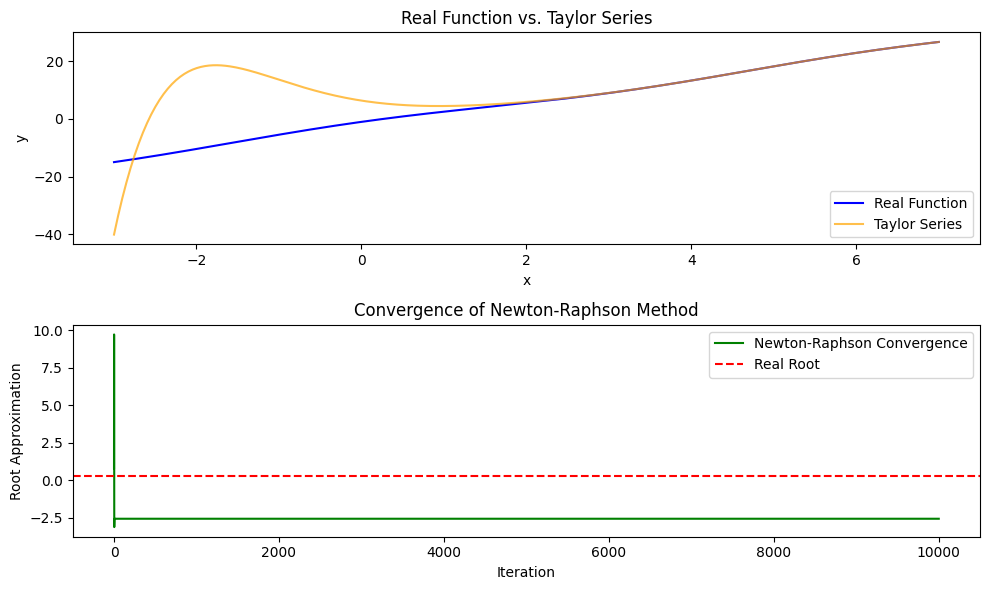

Taylor series expansion of 4*x + cos(x) - 2 around a = 7 up to degree 10:
         10                 9                 8                 7             
  (x - 7)  ⋅cos(7)   (x - 7) ⋅sin(7)   (x - 7) ⋅cos(7)   (x - 7) ⋅sin(7)   (x 
- ──────────────── - ─────────────── + ─────────────── + ─────────────── - ───
      3628800             362880            40320              5040           

    6                 5                 4                 3                 2 
- 7) ⋅cos(7)   (x - 7) ⋅sin(7)   (x - 7) ⋅cos(7)   (x - 7) ⋅sin(7)   (x - 7) ⋅
──────────── - ─────────────── + ─────────────── + ─────────────── - ─────────
   720               120                24                6                 2 

                                           
cos(7)                                     
────── + (4 - sin(7))⋅(x - 7) + cos(7) + 26
                                           
Final Root Approximation using Newton-Raphson: -2.57618288494872
Real Root of 4*x + cos(x) - 2: 0.258293158505120
Er

In [13]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def find_root_and_taylor_series(a, num_iterations):
    # Define the symbolic variable x
    x = sp.symbols('x')

    # Define the function f(x) = cos(x) + 4x - 2
    f = sp.cos(x) + 4*x - 2

    # Compute the Taylor series expansion around a up to degree 10
    taylor_series = sum([f.diff(x, i).subs(x, a) / sp.factorial(i) * (x - a)**i for i in range(11)])

    # Convert the Taylor series and its derivative to numerical functions
    taylor_series_num = sp.lambdify(x, taylor_series, 'numpy')
    derivative_taylor_series_num = sp.lambdify(x, sp.diff(taylor_series, x), 'numpy')

    # Define the Newton-Raphson iteration formula using the numerical functions
    def iteration_formula(x_val):
        return x_val - taylor_series_num(x_val) / derivative_taylor_series_num(x_val)

    # Initialize the iteration with a random initial guess between -3 and 7
    initial_guess = np.random.uniform(-3, 7)
    root_approximations = [initial_guess]

    # Iterate using the Newton-Raphson method on the Taylor series
    for _ in range(num_iterations):
        root_approximations.append(iteration_formula(root_approximations[-1]))

    # Plot the function, its Taylor series, and the convergence of Newton-Raphson
    x_vals = np.linspace(-3, 7, 400)
    f_numeric = sp.lambdify(x, f, 'numpy')

    plt.figure(figsize=(10, 6))

    # Plot the function
    plt.subplot(2, 1, 1)
    plt.plot(x_vals, f_numeric(x_vals), label='Real Function', color='blue')
    plt.plot(x_vals, taylor_series_num(x_vals), label='Taylor Series', color='orange', alpha=0.7)
    plt.title('Real Function vs. Taylor Series')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    # Plot the convergence of Newton-Raphson
    plt.subplot(2, 1, 2)
    plt.plot(root_approximations, label='Newton-Raphson Convergence', color='green')
    plt.axhline(sp.nsolve(f, 0), color='red', linestyle='--', label='Real Root')
    plt.title('Convergence of Newton-Raphson Method')
    plt.xlabel('Iteration')
    plt.ylabel('Root Approximation')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print the pretty representation of the Taylor series
    print(f"Taylor series expansion of {f} around a = {a} up to degree 10:")
    print(sp.pretty(taylor_series, use_unicode=True))

    # Print the final root approximation and error
    final_root_approximation = root_approximations[-1]
    real_root = sp.nsolve(f, 0)  # Starting from x=0
    error = abs(real_root - final_root_approximation)

    print(f"Final Root Approximation using Newton-Raphson: {final_root_approximation}")
    print(f"Real Root of {f}: {real_root}")
    print(f"Error: {error}")
    print("_____________________________________________\n\n\n")

# Example usage
find_root_and_taylor_series(-3, num_iterations=10000)
find_root_and_taylor_series(4, num_iterations=10000)
find_root_and_taylor_series(7, num_iterations=10000)
